## LV_1. 다트게임

카카오톡 게임별의 하반기 신규 서비스로 다트 게임을 출시하기로 했다. 다트 게임은 다트판에 다트를 세 차례 던져 그 점수의 합계로 실력을 겨루는 게임으로, 모두가 간단히 즐길 수 있다.
갓 입사한 무지는 코딩 실력을 인정받아 게임의 핵심 부분인 점수 계산 로직을 맡게 되었다. 다트 게임의 점수 계산 로직은 아래와 같다.

1. 다트 게임은 총 3번의 기회로 구성된다.
2. 각 기회마다 얻을 수 있는 점수는 0점에서 10점까지이다.
3. 점수와 함께 Single(S), Double(D), Triple(T) 영역이 존재하고 각 영역 당첨 시 점수에서 1제곱, 2제곱, 3제곱 (점수1 , 점수2 , 점수3 )으로 계산된다.
4. 옵션으로 스타상(```*```) , 아차상(#)이 존재하며 스타상(```*```) 당첨 시 해당 점수와 바로 전에 얻은 점수를 각 2배로 만든다. 아차상(#) 당첨 시 해당 점수는 마이너스된다.
5. 스타상(```*```)은 첫 번째 기회에서도 나올 수 있다. 이 경우 첫 번째 스타상(*)의 점수만 2배가 된다. (예제 4번 참고)
6. 스타상(```*```)의 효과는 다른 스타상(*)의 효과와 중첩될 수 있다. 이 경우 중첩된 스타상(```*```) 점수는 4배가 된다. (예제 4번 참고)
7. 스타상(```*```)의 효과는 아차상(#)의 효과와 중첩될 수 있다. 이 경우 중첩된 아차상(#)의 점수는 -2배가 된다. (예제 5번 참고)
8. Single(S), Double(D), Triple(T)은 점수마다 하나씩 존재한다.
9. 스타상(```*```), 아차상(#)은 점수마다 둘 중 하나만 존재할 수 있으며, 존재하지 않을 수도 있다.
0~10의 정수와 문자 S, D, T, *, #로 구성된 문자열이 입력될 시 총점수를 반환하는 함수를 작성하라.

### 입력 형식

"점수|보너스|[옵션]"으로 이루어진 문자열 3세트.
예) 1S2D*3T

- 점수는 0에서 10 사이의 정수이다.
- 보너스는 S, D, T 중 하나이다.
- 옵선은 *이나 # 중 하나이며, 없을 수도 있다.


### 출력 형식
3번의 기회에서 얻은 점수 합계에 해당하는 정수값을 출력한다.
예) 37

### 입출력 예 #1

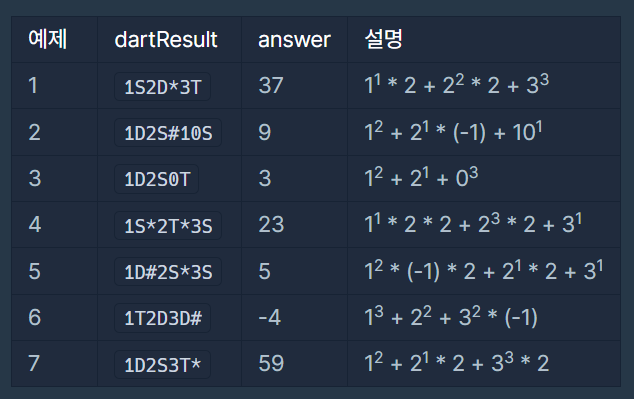

### 내 풀이

In [171]:
dartResult = '1D2S#10S'

import re
def solution(dartResult):
    # 정규식을 사용하여 다트 결과를 토큰화
    tokens = re.findall(r'\d{1,2}[SDT][*#]?', dartResult)

    scores = []
    for i, token in enumerate(tokens):
        score = int(re.findall(r'\d{1,2}', token)[0])
        bonus = re.findall(r'[SDT]', token)[0]
        option = None

        # 옵션이 있는 경우 처리
        if len(token) == 3:
            option = token[-1]
        print('1. 정규식을 사용하여 다트 결과를 토큰화')
        print(score, bonus, option)
        
        # 보너스 계산
        if bonus == 'D':
            score = score ** 2
            
        elif bonus == 'T':
            score = score ** 3
        print('2. 보너스 계산')
        print(score, bonus, option)        

        # 옵션 계산
        if option == '*':
            if i > 0:
                scores[i-1] = scores[i-1] * 2
            score = score * 2
        elif option == '#':
            score = score * (-1)
        print('3. 옵션 계산')
        print(score, bonus, option)
        
        scores.append(score)
        print(scores)
    
    return sum(scores)

solution(dartResult)


1. 정규식을 사용하여 다트 결과를 토큰화
1 D None
2. 보너스 계산
1 D None
3. 옵션 계산
1 D None
[1]
1. 정규식을 사용하여 다트 결과를 토큰화
2 S #
2. 보너스 계산
2 S #
3. 옵션 계산
-2 S #
[1, -2]
1. 정규식을 사용하여 다트 결과를 토큰화
10 S S
2. 보너스 계산
10 S S
3. 옵션 계산
10 S S
[1, -2, 10]


9

re.findall(r'\d{1,2}[SDT][*#]?', dartResult)는 정규식을 사용하여 dartResult 문자열에서 패턴에 맞는 토큰들을 찾아 리스트로 반환하는 코드입니다. 이 코드의 동작을 자세히 설명하겠습니다.

1. \d{1,2}: 1자리 또는 2자리의 숫자에 일치합니다. 숫자는 다트에서 얻은 점수를 나타냅니다.
2. [SDT]: 'S', 'D', 'T' 중 하나에 일치합니다. 이는 다트에서의 보너스를 나타냅니다.
3. [*#]?: '*' 또는 '#' 문자에 일치할 수 있습니다. 이는 다트에서의 옵션을 나타냅니다. '?'는 해당 패턴이 0번 또는 1번 나타날 수 있다는 것을 나타냅니다.

### 다른 사람 풀이

In [180]:
dartResult = '1D2S#10S'

import re
def solution(dartResult):
    bonus = {'S' : 1, 'D' : 2, 'T' : 3}
    option = {'' : 1, '*' : 2, '#' : -1}
    
    p = re.compile('(\d+)([SDT])([*#]?)')
    dart = p.findall(dartResult)
    print('1. 정규식을 사용하여 다트 결과를 토큰화')
    print(dart)
    
    for i in range(len(dart)):
        if dart[i][2] == '*':
            dart[i-1] *= 2
        dart[i] = int(dart[i][0]) ** bonus[dart[i][1]] * option[dart[i][2]]
        print('2. 보너스와 옵션 계산')
        print(dart)
        
    answer = sum(dart)
    return answer

solution(dartResult)

1. 정규식을 사용하여 다트 결과를 토큰화
[('1', 'D', ''), ('2', 'S', '#'), ('10', 'S', '')]
2. 보너스와 옵션 계산
[1, ('2', 'S', '#'), ('10', 'S', '')]
2. 보너스와 옵션 계산
[1, -2, ('10', 'S', '')]
2. 보너스와 옵션 계산
[1, -2, 10]


9